In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/mattmastin/Desktop/shopify_challenge/shopify_challenge_data.csv')

print(df.shape)

df.head()

(5000, 8)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_cost
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [19]:
df['avg_shoe_cost'] = df['order_amount'] / df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_cost
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [37]:
orders_over_100k = df[df['order_amount'] >= 100000]
print(orders_over_100k.shape)
print(f"Average total items in orders over $100k: {int(orders_over_100k['total_items'].mean())}")
orders_over_100k.head()

(19, 8)
Average total items in orders over $100k: 1790


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_cost
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0


In [27]:
expensive_shoes = df[df['avg_shoe_cost'] >= 1000]
print(expensive_shoes.shape)
print(expensive_shoes['avg_shoe_cost'].mean())
expensive_shoes.head()

(46, 8)
25725.0


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_cost
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


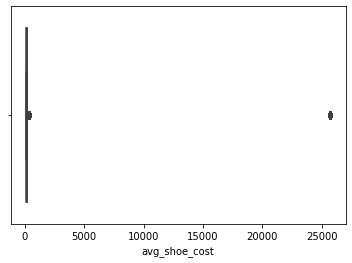

In [26]:
# Boxplot to visualize outliers
# There seems to be one pair that costs $25,725, schewing the average high
# Possibly the DJ Khaled x Air Jordan 3 'Grateful' or Auto-Lacing Nike Mag
# It is the only shoe in the dataset that costs over $1,000

sns.boxplot(x=df['avg_shoe_cost'])